# Project Overview

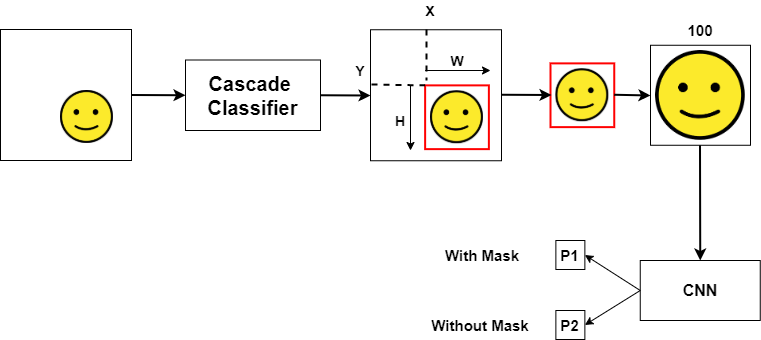

# The Dataset

The dataset consisted of 1376 images, 690 face images with masks and 686 without masks.

# Data Preprocessing
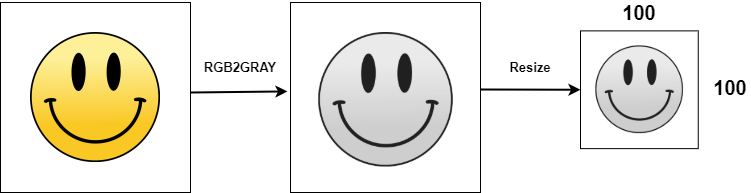

In [1]:
import cv2,os

data_path='dataset'       #Giving the path of the dataset
categories=os.listdir(data_path)      #Loading all the folders in dataset
labels=[i for i in range(len(categories))]  #setting labels for the categories

label_dict=dict(zip(categories,labels)) 

print(label_dict)
print(categories)
print(labels)

ModuleNotFoundError: No module named 'cv2'

In [2]:
img_size=100
data=[]
target=[]


for category in categories:
    folder_path=os.path.join(data_path,category)  #Loading the images in the categories(folders)
    img_names=os.listdir(folder_path)
        
    for img_name in img_names:
        img_path=os.path.join(folder_path,img_name)  #Reading every image 
        img=cv2.imread(img_path)

        try:
            gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)           
            #Coverting the image into gray scale
            resized=cv2.resize(gray,(img_size,img_size))
            #resizing the gray scale into 100x100, since we need a fixed common size for all the images in the dataset
            data.append(resized)
            target.append(label_dict[category])
            #appending the image and the label(categorized) into the list (dataset)

        except Exception as e:
            print('Exception:',e)
            #if any exception rasied, the exception will be printed here. And pass to the next image

NameError: name 'categories' is not defined

In [2]:
import numpy as np

data=np.array(data)/255.0  #normalizing and converting the pixel range to 0 and 1
data=np.reshape(data,(data.shape[0],img_size,img_size,1)) #Creating 4D array 
target=np.array(target)

from keras.utils import np_utils

new_target=np_utils.to_categorical(target)  #converting the target into categorical representations

NameError: name 'data' is not defined

In [ ]:
np.save('data',data)    #contains images
np.save('target',new_target)  #contains whether image is with mask or without mask